# HW 1 - Statistical learning and Optimization

Complete the following questions and resubmit this entire notebook to canvas.
- For questions that ask you to derive or find a quantity use a __text cell__ to show your calculations.
 - Use markdown to write math expressions (as was done to create these problems) and make sure to show your work.
 - It doesnt have to be perfect looking but it needs to be readible and clear. No extraneous work please.
- For questions that ask you compute something or write code use a __code cell__ to write your code.
 - You can create additional code cells as needed.
 - Just make sure your code is commented, the functions are named appropriately, and its easy to see your final answer.
- The total points on this homework is 100. Out of these 5 points are reserved for clarity of presentation,
punctuation and commenting with respect to the code.

__SUBMISSION__

When you submit you will submit a pdf file __and__ the notebook file. The TA will use the pdf file to grade more quickly. The notebook file is there to confirm your work.

To generate a pdf file
1. Click File
2. Click print
3. Set the destinationas "save as pdf"
4. Hit print

Title the pdf file `LASTNAME-FIRSTNAME-HW1.pdf`
Title your notebook file as `LASTNAME-FIRSTNAME-HW1.ipynb`

Submit both files.

Do not actually print your notebook out (what year is this?)



In [1]:
# libraries and functions you may find useful
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

# Q1 - Linear Algebra and Probability Review (20 points)

    

## part 1 - Basic Operations (6 points)

 Compute the following operations using functions from **pytorch**

  1. $$\begin{pmatrix} 1 & 2 \\ 4 & 5  \end{pmatrix} + \begin{pmatrix} -1 & 2 \\ -3 & 4 \end{pmatrix}$$

  2. $$\begin{pmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{pmatrix} \begin{pmatrix} -1 & 2 \\ -3 & 4\\-5 & 6 \end{pmatrix}$$

  3. $$\begin{pmatrix} 1 & 1 & -1\\ -1 & 1 & -1 \\ 1 & -1 & 1\end{pmatrix} \begin{pmatrix} 4 \\ -3 \\ -2 \end{pmatrix}$$

  4. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^T$$

  5. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^{-1}$$
  
  6. $$\text{det} \begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}$$

In [2]:
# q1
torch.tensor([[1,2], [4,5]]) + torch.tensor([[-1,2], [-3,4]])


tensor([[0, 4],
        [1, 9]])

In [3]:
# q2
torch.matmul(torch.tensor([[1,2,3], [4,5,6]]), torch.tensor([[-1,2], [-3,4], [-5,6]]))


tensor([[-22,  28],
        [-49,  64]])

In [4]:
# q3
torch.matmul(torch.tensor([[1,1,-1], [-1,1,-1], [1,-1,1]]) , torch.tensor([[4], [-3], [-2]]))


tensor([[ 3],
        [-5],
        [ 5]])

In [5]:
# q4
torch.transpose(torch.tensor([[1,4,3], [4,2,-6], [-1,-2,1]]), 0, 1)

tensor([[ 1,  4, -1],
        [ 4,  2, -2],
        [ 3, -6,  1]])

In [6]:
# q5
torch.linalg.inv(torch.tensor([[1,4,3], [4,2,-6], [-1, -2, 1]], dtype = torch.float32))


tensor([[ 0.5000,  0.5000,  1.5000],
        [-0.1000, -0.2000, -0.9000],
        [ 0.3000,  0.1000,  0.7000]])

In [7]:
# q6

torch.linalg.det(torch.tensor([[1,4,3], [4, 2, -6], [-1, -2, 1]], dtype = torch.float32))

tensor(-20.)

## part 2 - Eigenvalues (2 points)

Use **pytorch** to find the largest 5 eigenvalues of $\frac{1}{500}X^T X$, where $X$ is provided below (do not change $X$)

_note: for this problem, you will need to convert the numpy object to a torch object_

In [8]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])

x_tensor = torch.tensor(x, dtype = torch.float32)

x_transpose = torch.transpose(x_tensor,0, 1)

eigenvalues = torch.linalg.eigvals((1/500) * torch.matmul(torch.transpose(x_tensor, 0, 1), x_tensor)).real

torch.topk(eigenvalues, 5)

torch.return_types.topk(
values=tensor([1.3988, 1.3255, 1.2848, 1.2588, 1.2396]),
indices=tensor([0, 2, 3, 5, 4]))

## part 3 - Normalization (6 points)

1. Divide each column of the matrix $X$ by its Euclidean ($L^2$) norm. Print the average value of all elements.

2. Scale each column of the matrix $Y$ so that the min and max of each column are 0.0 and 1.0 respectively. Print the average value of all elements.

3. Normalize the vector $Z$ so that each element is positive, bounded between 0.0 and 1.0, and all elements sum to 1.0. Print the average value of all elements.

In [9]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])
y = np.random.normal(0, 1, [500, 25])
z = np.random.normal(0, 1, [10])

In [10]:
# part 3.1
x_tensor = torch.tensor(x)
x_norm = torch.norm(x_tensor)
x_tensor/ x_norm

tensor([[ 1.5900e-02,  3.6067e-03,  8.8216e-03,  ...,  7.7914e-03,
         -6.6893e-03,  2.0458e-02],
        [-1.3109e-02,  4.1243e-04, -1.6871e-03,  ...,  7.0077e-03,
         -1.4546e-02, -1.9175e-03],
        [-8.0710e-03,  3.4872e-03, -4.6040e-03,  ...,  1.0270e-02,
         -1.1130e-02,  3.6264e-03],
        ...,
        [ 1.3873e-02,  8.7848e-04, -1.4105e-02,  ..., -9.1931e-04,
         -1.2343e-03, -3.0093e-03],
        [-3.8012e-03, -5.6569e-03, -7.9596e-05,  ..., -4.7022e-03,
         -8.1047e-03,  2.8657e-03],
        [-1.5827e-02,  2.2005e-02, -9.1172e-03,  ..., -3.6388e-03,
         -6.4690e-04, -7.6543e-03]], dtype=torch.float64)

In [11]:
# part 3.2
y_tensor = torch.tensor(y)
torch.mean((y_tensor - torch.min(y_tensor)) / (torch.max(y_tensor) - torch.min(y_tensor)))

tensor(0.5388, dtype=torch.float64)

In [12]:
# part 3.3
z_tensor = torch.tensor(z)
z_scale = (z_tensor - torch.min(z_tensor)) / (torch.max(z_tensor) - torch.min(z_tensor))
torch.mean(z_scale / torch.sum(z_scale))

tensor(0.1000, dtype=torch.float64)

## part 4 - Basic probability (6 points)

1. Let $X \sim N(0, 2)$ and $Y \sim N(1, 0.5)$. In a normal distribution $N(\mu, \sigma^2)$, the first parameter $\mu$ is the mean and the second parameter $\sigma^2$ is the variance. Use **pytorch** to estimate the following quantities. Use at least 5000 draws from each distribution.
  1. $P(X > 0)$, $P(X = 1)$, and $P(X < Y)$
  1. $P(X > -Y)$ and $P(-2.5 < X < 2Y)$
  2. $E(X)$, $E(XY)$, $E(X + Y)$ and $\sqrt{E(X^2 + Y^2)}$.

In [13]:
x = torch.normal(0, 2, (5000,))
y = torch.normal(1, 0.5, (5000,))

In [14]:
# part 4.1
print((x > 0).float().mean())
print((x == 1).float().mean())
print((x < y).float().mean())

tensor(0.4988)
tensor(0.)
tensor(0.6874)


In [15]:
# part 4.2
print((x > -y).float().mean())
print(((x > -2.5) & (x < 2*y)).float().mean())

tensor(0.6910)
tensor(0.7160)


In [16]:
# part 4.3
print(x.mean())
print((x * y).mean())
print((x+y).mean())
print((torch.sqrt((x**2 + y**2).mean())))

tensor(0.0246)
tensor(0.0124)
tensor(1.0359)
tensor(2.2749)


# Q2 - Statistical learning (33 points)



## part 1 - Design (12 points)

The following questions are open-ended basic design questions. I want you to think about them and briefly respond with your thoughts (**not chatgpt's thoughts**). You don't need to reference specific datasets or loss functions (we havent covered them yet), but just try to give a description of how you might go about solving the problem.


1. Suppose I want to predict the maximum price of bitcoin tomorrow using the daily maximum price of bitcoin from the previous 5 days. What kind of data should I collect to solve this problem? What are my features and what is my target? How might I measure if my model is performing well or not?

* Numerical Data that might be worth collecting is the daily maximum price of bitcoin for the past days and trading volume. Categorical variables that might be worth collecting is if the day ended in the positive or negative.
* Features: Daily maximums, trading volume, and day ending in positive or negative
* Target variable: maximum price of bitcoin tomorrow
* Loss function: in order to tell if the model is performing well or not, we would need a loss function, for example: MAE, MSE, and some type of categorical loss, such as BCE

2. Suppose I have xray scans of patients lungs and I want to detect if they have covid or not. What kind of data should I collect to solve this problem? What other kinds of data might be helpful? What are my features and what is my target? How might I measure if my model is performing well or not?

* Data: for this data, we would primarily use cateogorical data. Examples: binary variables such as symptoms and test results. Other data that might be useful is x-ray images.
* Features: symptoms, test results, x-ray images
* Target: if the patient has covid or not
* Loss function: since most variables are categorical data, we would use a categorical loss function such as BCE

3. Suppose I want to train a model to de-blur images and remove watermarks. How might you go about constructing a dataset to train a model to solve this task? What are my features and targets? How might I measure if my model is performing well or not?

* To construct a dataset to train this model we would need images that are blurry and or watermarked images. We would also need high-quality images to compare them to.
* Data: we need blurry and or watermarked images and high quality images to train, test, and validate.
* Features: blurred and or watermarked images
* Target: sharp, watermark-free images
* Loss Function: MSE that measures the pixel values

4. Suppose I want to train a model to translate English to Mandarin. How might I go about constructing a dataset to train a model to solve this task? What would be your models inputs and outputs? How might you measure whether your model performs well or not?

* To construct a dataset, we could look for articles that have both English and Mandarin so we can use their translations.
* We could use google translate to translate words from English to Mandarin, or another costly alternative is to translate with a translator.
* Inputs: English sentences
* Output/target: Mandarin Setnences
* Loss: we could have fluent speakers of both languages to evaluate whether the translation makes sense or not.


## part 2 - Learning objectives (6 points)

Suppose I have features $X$ and targets $Y$ whos true relationship is
$$
Y = g(X) + \epsilon
$$
where $g$ is an unknown function and $\epsilon \sim N(0, \sigma^2)$. Since I don't know $g$, I decide to model $Y$ as
$$
Y = f(X) + \epsilon
$$
where $f$ is your favorite model and $\epsilon \sim N(0, \sigma^2)$.

1. What is the difference between $E(Y \mid X)$ and $E(f(X) \mid X)$? Why do I want them to be as close as possible?

1. What is the difference between $P(Y \mid X)$ and $P(f(X) + \epsilon \mid X)$? Why do I want them to be as close as possible?

\\


1. $E(Y \mid X) = g(X)$, while $E(f(X) \mid X) = f(X)$. The reason is because $E(Y \mid X)$ is supposed to be our predictor for the true relatioship. We expect our predictor to be close to the true relationship. $E(f(X) \mid X) = f(X)$ because $f(X)$ is our model's estimate of $g(X)$, which might be incorrect due to bias.

1. $P(Y \mid X) = P(g(X) + \epsilon | X)$. We want this and $P(f(X) + \epsilon \mid X)$ to be as close as possible because $P(Y \mid X)$ is supposed to predict the true uncertainty in the data. If they are different, then our model is inaccurate and will produce unreliable predictions.

## part 3 - Train and test loss (6 points)

Let $Z_{train}$ denote the training dataset and $Z_{test}$ denote the test dataset. We train a model $\hat f$ on $Z_{train}$ using loss function $\mathcal{L}$. We then apply our model to $Z_{test}$.

1. Intuitively explain why we would expect $\mathcal{L}(\hat f, Z_{train}) \leq \mathcal{L}(\hat f, Z_{test})$?

2. Is it possible for $\mathcal{L}(\hat f, Z_{test}) \leq \mathcal{L}(\hat f, Z_{train})$? Why or why not?

\\

1. $\mathcal{L}(\hat f, Z_{train}) \leq \mathcal{L}(\hat f, Z_{test})$ because our model reuses the same training data in order to optimize our loss functions. Since we are only using the same training data, once we use a new test model, it is likely our model is not going to be able to generalize as well to the test data as compared to the training. If the model has overfitted to the training set, its performance on the test set will likely be even worse.

1. $\mathcal{L}(\hat f, Z_{test}) \leq \mathcal{L}(\hat f, Z_{train})$ it is possible for this to happen, but it is rare. This happens if the test set is small and has "easier" data points that can be handled well by the model.


## part 4 - Learnability (9 points)

Suppose the true relationship between $Y \in \mathbb{R}$ and $X \in \mathbb{R}$ (i.e. both are real numbers) is
$$
Y = 4 \log(X^2 + 2) + \frac{1}{4}\sin(4\pi X)) + \epsilon
$$

and I assume the following model
$$
Y = \alpha + \beta X + \epsilon
$$

1. Will model be able to learn the true function with infinite training data? State why or why not.

2. Will it be possible to reduce this model's bias to 0 with infinite training data? State why or why not.

3. Will it be possible to reduce this model's variance to 0 with infinite training data? State why or why not.

\\

1. No, the model cannot learn the true function because the assumed model is linear, while the true relationship is highly nonlinear. Even if we had infinite data, the model will never show the true relationship.

1. No, since the model cannot learn the true function, the bias will not be zero since the model assumption itself is incorrect

1. The variance can be reduced to 0 with infinite data, since variance is only error due to randomness in the training data; however, bias will still remain high.

# Q3 - Optimization (32 points)

## part 1 - Convex checking (6 points)

Plot each of the following functions in a single figure with 6 subfigures arranged in a 1x6 grid [(Example)]. Label each subfigure. For each function state whether it is convex or not over the range $[-1, 1]$. Check $f''(x) \geq 0$ if you need.

1. $f(x) = x^2$
2. $f(x) = -x^3$
3. $f(x) = \exp(x) + x \log x$
4. $f(x) = x + x^2 + x^3 + x^4$
5. $f(x) = 2x^2 + 2x^4 + 2x^6$
6. $f(x) = \log(x^2 + 1)$


[(Example)]: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

<ipython-input-17-1606ff855a28>:5: RuntimeWarning: invalid value encountered in log
  y3 = np.exp(x) + x * np.log(x)


Text(0.5, 1.0, 'log(x^2 + 1) - Convex')

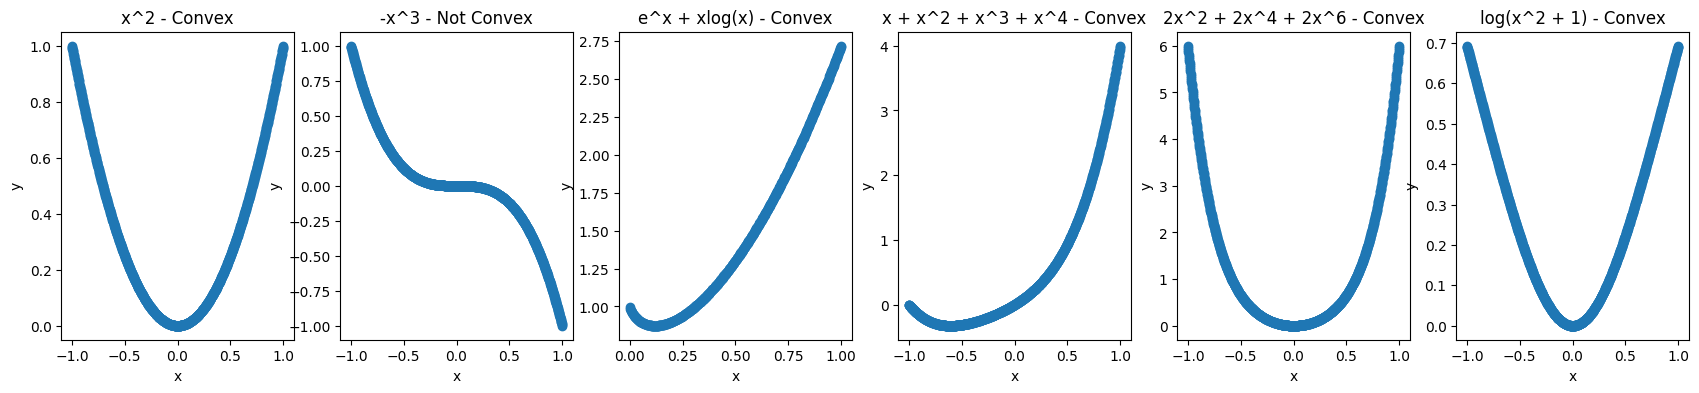

In [17]:
x = np.linspace(-1, 1, 1000)

y1 = x**2
y2 = -x**3
y3 = np.exp(x) + x * np.log(x)
y4 = x + x**2 + x**3 + x**4
y5 = 2*x**2 + 2*x**4 + 2*x**6
y6 = np.log(x**2 + 1)

fig, ax = plt.subplots(1,6, figsize = (21,4))
ax[0].scatter(x, y1)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("x^2 - Convex")

ax[1].scatter(x, y2)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("-x^3 - Not Convex")

ax[2].scatter(x, y3)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title("e^x + xlog(x) - Convex")

ax[3].scatter(x, y4)
ax[3].set_xlabel('x')
ax[3].set_ylabel('y')
ax[3].set_title('x + x^2 + x^3 + x^4 - Convex')

ax[4].scatter(x, y5)
ax[4].set_xlabel('x')
ax[4].set_ylabel('y')
ax[4].set_title('2x^2 + 2x^4 + 2x^6 - Convex')

ax[5].scatter(x, y6)
ax[5].set_xlabel('x')
ax[5].set_ylabel('y')
ax[5].set_title('log(x^2 + 1) - Convex')


## part 2 - Optimization in pytorch (6 points)

Use **pytorch** and **gradient descent** to find the values that minimize of the following functions. You must write your own gradient descent loop but you can use pytorch's autodiff tools to find the gradients for you.

1. $f(x) = 500x^2$
2. $f(x) = x^4 \log(x^2 + 1)$
3. $f(x, y) = y^2(x \log(x^2 + 1) + x^3)$

In [18]:
def func1(u):
  return 500*u**2
u1 = 20 * torch.ones(1)
u1.requires_grad_()
for _ in range(1000):
  eval = func1(u1)
  eval.backward()
  u1.data = u1.data - 1e-3 * u1.grad
  u1.grad.zero_()
print("Question 1 : ",u1.data)

def func2(u):
  return u**4 * torch.log(u**2 + 1)
u2 = 1 * torch.ones(1)
u2.requires_grad_()
for _ in range (1000):
  eval = func2(u2)
  eval.backward()
  u2.data = u2.data - 1e-3 * u2.grad
  u2.grad.zero_()
print("Question 2 : ", u2.data)

def func3(u,v):
  return v**2 * (torch.log(u**2 + 1) + u**2)

u3 = 0.5 * torch.ones(1)
v3 = 0.5 * torch.ones(1)
u3.requires_grad_()
v3.requires_grad_()
for _ in range(1000):
  eval = func3(u3,v3)
  eval.backward()
  u3.data = u3.data - 1e-2 * u3.grad
  u3.grad.zero_()
  v3.data = v3.data - 1e-2 * u3.grad
  v3.grad.zero_()
print("Question 3 x: ",u3.data)
print("Question 3 y: ",v3.data)

Question 1 :  tensor([0.])
Question 2 :  tensor([0.4694])
Question 3 x:  tensor([2.2914e-05])
Question 3 y:  tensor([0.5000])


## part 3 - Global optimization (6 points)

Suppose we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

1. Over what range of starting values $x_0$ will gradient descent be guaranteed to find the __global__ minimum? I.e. find the interval of $x$ values whos local minima is the global minima. You don't need to solve for this exactly, just estimate the range to the first decimal place.

* Since the first term of the function is x^2, the function will behave similarly to a quadratic function. All of the sin parts of the function will equal 0 when x is an integer. Therefore, a range that will guaranteed to find the global minima is [-0.9, 0.9]. This is because when x = 0, the x^2 portion of the function equals 0, and the sin functions will equal 0, so we are expecting a global minima of around 0.

2. What happens if we initialize outside this range and run gradient descent?

* If we initialize outside this range, the gradient descent may still converge, but there is a higher risk of convergence to a local minimum rather than the global minimum.

3. Use pytorch and gradient descent to find the global minimizer using a valid starting point.

In [19]:
def func(u):
  return u**2 + torch.sin(torch.pi * u) + 0.5 * torch.sin(2 * torch.pi * u) + 0.5 * torch.sin(3* torch.pi * u) + 0.5 * torch.sin(4 * torch.pi * u)
u1 = 0.5 * torch.ones(1)
u1.requires_grad_()
for _ in range(1000):
  eval = func1(u1)
  eval.backward()
  u1.data = u1.data - 1e-3 * u1.grad
  u1.grad.zero_()
print(u1.data)


tensor([0.])


## part 4 - modifying gradient descent (6 points)

Suppose again that we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

This time, lets assume that we do not know what the valid starting points are. Think of a way to modify your gradient descent procedure to find the global minima of this function for any starting point in $[-2, 2]$. Implement your idea and test it on the starting points $\{-2, -1, 0, 1, 2\}$.
  - Couple of ideas to consider:
    1. High learning rates can help explore parameter space quickly. Low learning rates help convergence.
    2. Small amounts of noise added to the gradient updates can help jump out of local minima
    3. Repeated reinitialization might land you in the optimal starting zone by chance
    4. This function is close to a simple convex function, maybe the convex function's minima is close to this functions minima?

  - Describe the pros and cons of your solution in terms of how often you observe it converging to the correct value and how long it takes to run.
  - Do not cheat and manually reinitialize in the valid region you found in part 3.

In [28]:
def func(u):
  return u**2 + torch.sin(torch.pi * u) + 0.5 * torch.sin(2 * torch.pi * u) + 0.5 * torch.sin(3* torch.pi * u) + 0.5 * torch.sin(4 * torch.pi * u)
starting_points = [-2.0, -1.0, 0.0, 1.0, 2.0]
for i in starting_points:
  u1 = i * torch.ones(1)
  u1.requires_grad_()
  for _ in range(1000):
    eval = func1(u1)
    eval.backward()
    u1.data = u1.data - 1e-3 * (u1.grad + torch.randn_like(u1) * 0.01)
    u1.grad.zero_()
  print(u1.data)


tensor([4.1952e-06])
tensor([-2.6276e-05])
tensor([-7.0456e-06])
tensor([-1.0755e-05])
tensor([-2.8094e-07])


## part 5 - fitting models (8 points)

Use pytorch to fit the following models to the provided data (do not change the data)

- $f(x) = \alpha + \beta_1 x$
- $g(x) = \alpha + \beta_1 x + \beta_2 x^2$
- $h(x) = \alpha + \beta_1 x  + \beta_2 x^2 + \beta_3 \sin(\beta_4 x)$

1. Each of these models represents a function from a certain model class. Which class is the largest and which is the smallest?
* h(x) is the largest model due to its additional sine term compared to g(x)
* f(x) is the smallest and simplest model
2. Which model should achieve the lowest training MSE? Which model should have highest training MSE?
* f(x) should have the highest MSE because it is the simplest model, while h(x) might be able to achieve the lowest MSE due to its complexity.
3. Fit each model to the data using the MSE loss and compare their training MSEs. Which model actually achieved the lowest training MSE?

4. Evaluate each model on the test data. Which model had the lowest test MSE?


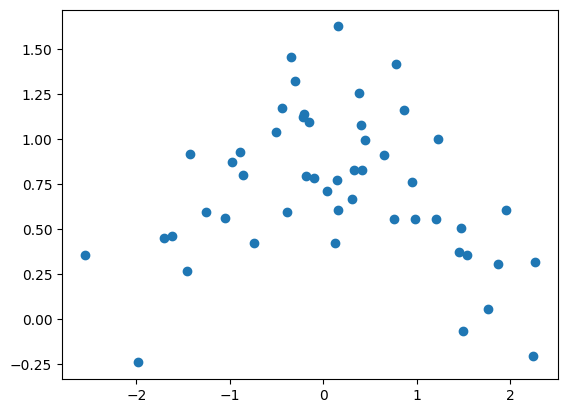

In [20]:
np.random.seed(0)
x = np.random.normal(0, 1, [50, 1])
y = np.exp(-x**2/3) + np.random.normal(0, 1/3, [50, 1])

plt.scatter(x, y)

In [93]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class ModelF(nn.Module):
    def __init__(self):
        super(ModelF, self).__init__()
        self.alpha = nn.Parameter(torch.randn(1))
        self.beta = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.alpha + self.beta * x**2

class ModelG(nn.Module):
    def __init__(self):
        super(ModelG, self).__init__()
        self.alpha = nn.Parameter(torch.randn(1))
        self.beta1 = nn.Parameter(torch.randn(1))
        self.beta2 = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.alpha + self.beta1 * x + self.beta2 * x**2

class ModelH(nn.Module):
    def __init__(self):
        super(ModelH, self).__init__()
        self.alpha = nn.Parameter(torch.randn(1))
        self.beta1 = nn.Parameter(torch.randn(1))
        self.beta2 = nn.Parameter(torch.randn(1))
        self.beta3 = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.alpha + self.beta1 * x + self.beta2 * x**2 + self.beta3 * torch.sin(self.beta1 * x)

def train_model(model, x_train, y_train, epochs=10000, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    return model, loss.item()

model_f = ModelF()
model_g = ModelG()
model_h = ModelH()

model_f, loss_f = train_model(model_f, x_train, y_train)
model_g, loss_g = train_model(model_g, x_train, y_train)
model_h, loss_h = train_model(model_h, x_train, y_train)

print(f"Training MSE for Model F: {loss_f}")
print(f"Training MSE for Model G: {loss_g}")
print(f"Training MSE for Model H: {loss_h}")

Training MSE for Model F: 0.06820674985647202
Training MSE for Model G: 0.02486514486372471
Training MSE for Model H: 0.014972471632063389


In [94]:
criterion = nn.MSELoss()

with torch.no_grad():
    y_pred_f = model_f(x_test)
    y_pred_g = model_g(x_test)
    y_pred_h = model_h(x_test)

    test_loss_f = criterion(y_pred_f, y_test).item()
    test_loss_g = criterion(y_pred_g, y_test).item()
    test_loss_h = criterion(y_pred_h, y_test).item()

print(f"Test MSE for Model F: {test_loss_f}")
print(f"Test MSE for Model G: {test_loss_g}")
print(f"Test MSE for Model H: {test_loss_h}")

Test MSE for Model F: 0.06811140477657318
Test MSE for Model G: 0.02631697617471218
Test MSE for Model H: 0.016239574179053307


# Q4 - Application (10 points)

You are in charge of monitoring air quality in Italy. Your job is to predict the concentration of CO, C6H6, NOx, and NO2 based on sensor readings of temperature, humidity, and various other gas concentrations. Use the following dataset to build a single linear regression model that uses the 9 features to predict the 4 targets. Verify that your model has converged on train and that it generalizes to validation (each loss < 0.03). When you have settled on an optimal model, check and report the loss on train, test, and validation and compare these numbers.

_hint: consider a low learning rate and long training time_

In [21]:
!pip install ucimlrepo

In [107]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
x = air_quality.data.features
x = x.dropna()

# separate into actual features and targets
y = torch.tensor(np.array(x.loc[:,['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]))
x = torch.tensor(np.array(x.drop(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], axis = 1)))

# rescale
x = torch.exp(x/1000)
y = torch.exp(y/1000)

# train, test, val
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)


In [108]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

input_dim = xtrain.shape[1]
output_dim = ytrain.shape[1]

model = LinearRegressionModel(input_dim, output_dim)

In [110]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [111]:
xtrain = xtrain.to(dtype=torch.float32)
ytrain = ytrain.to(dtype=torch.float32)
xtest = xtest.to(dtype=torch.float32)
ytest = ytest.to(dtype=torch.float32)
xval = xval.to(dtype=torch.float32)
yval = yval.to(dtype=torch.float32)

In [112]:
num_epochs = 25000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(xtrain)
    loss = criterion(outputs, ytrain)

    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.1210476160049438
Epoch 500, Loss: 0.16657589375972748
Epoch 1000, Loss: 0.12292209267616272
Epoch 1500, Loss: 0.09796731919050217
Epoch 2000, Loss: 0.08276266604661942
Epoch 2500, Loss: 0.0728972777724266
Epoch 3000, Loss: 0.06609199941158295
Epoch 3500, Loss: 0.0611162967979908
Epoch 4000, Loss: 0.05727977678179741
Epoch 4500, Loss: 0.054182302206754684
Epoch 5000, Loss: 0.051585447043180466
Epoch 5500, Loss: 0.0493435300886631
Epoch 6000, Loss: 0.04736530780792236
Epoch 6500, Loss: 0.04559206962585449
Epoch 7000, Loss: 0.04398484528064728
Epoch 7500, Loss: 0.042516786605119705
Epoch 8000, Loss: 0.04116865247488022
Epoch 8500, Loss: 0.03992604836821556
Epoch 9000, Loss: 0.03877769038081169
Epoch 9500, Loss: 0.03771444037556648
Epoch 10000, Loss: 0.03672860935330391
Epoch 10500, Loss: 0.03581356629729271
Epoch 11000, Loss: 0.034963492304086685
Epoch 11500, Loss: 0.03417316824197769
Epoch 12000, Loss: 0.033437907695770264
Epoch 12500, Loss: 0.03275345265865326
Epoch 130

In [113]:
model.eval()
with torch.no_grad():
    train_loss = criterion(model(xtrain), ytrain).item()
    val_loss = criterion(model(xval), yval).item()
    test_loss = criterion(model(xtest), ytest).item()

print(f'Train Loss: {train_loss:.4f}')
print(f'Validation Loss: {val_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0247
Validation Loss: 0.0264
Test Loss: 0.0243
